In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm

# Load a non-stationary dataset
df1 = pd.read_csv('tempandq.csv',index_col=0,parse_dates=True)
df1.index.freq = 'D'

In [2]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})
df
arr = acovf(df['a'])
arr

array([ 8. , -4. , -1.6,  2.2, -0.6])

In [6]:
arr3 = acf(df['a'])
arr3

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [7]:
arr4 = pacf_yw(df['a'],nlags=4,method='mle')
arr4

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [8]:
arr5 = pacf_yw(df['a'],nlags=4,method='unbiased')
arr5

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [9]:
arr6 = pacf_ols(df['a'],nlags=4)
arr6

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [13]:
from pandas.plotting import lag_plot

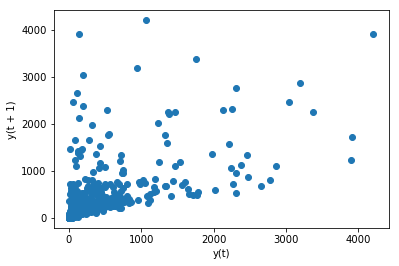

In [14]:
lag_plot(df1['q'])

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [16]:
acf(df1['q'])

array([1.        , 0.68527275, 0.44937836, 0.36697871, 0.29523863,
       0.24702588, 0.20049133, 0.16486326, 0.1630491 , 0.17067843,
       0.1780295 , 0.18326585, 0.19317399, 0.16698709, 0.13448538,
       0.12768259, 0.10637565, 0.09013869, 0.09248993, 0.07962878,
       0.06608919, 0.05625378, 0.05778682, 0.07094856, 0.07055034,
       0.06761307, 0.07111718, 0.09936202, 0.13637785, 0.14324009,
       0.11649274, 0.10631655, 0.07551172, 0.07753545, 0.0686386 ,
       0.05142729, 0.04766906, 0.03881219, 0.03417772, 0.04083569,
       0.04367852])

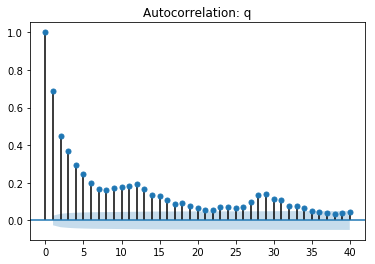

In [18]:
title = 'Autocorrelation: q'
lags = 40
plot_acf(df1['q'],title=title,lags=lags);

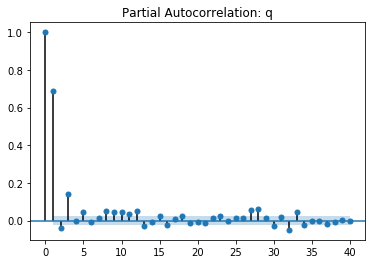

In [19]:
title='Partial Autocorrelation: q'
lags=40
plot_pacf(df1['q'],title=title,lags=lags);

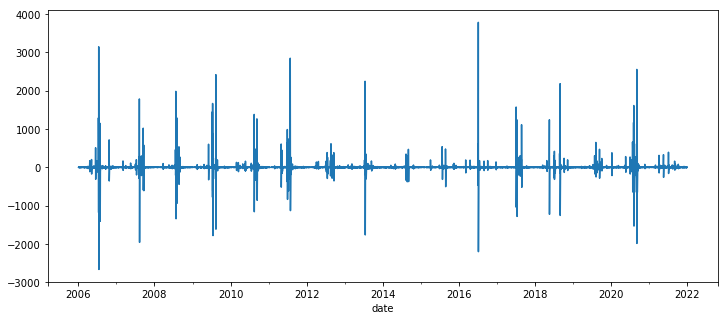

In [20]:
from statsmodels.tsa.statespace.tools import diff

df1['q'] = diff(df1['q'],k_diff=1)
df1['q'].plot(figsize=(12,5));

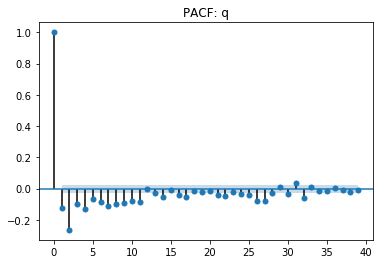

In [21]:
title='PACF: q'
lags=40
plot_pacf(df1['q'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

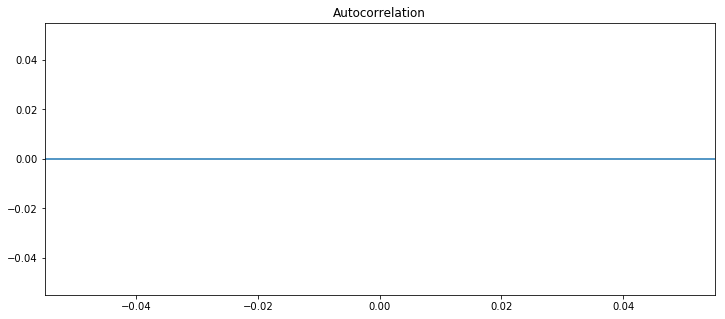

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df1['q'],ax=ax);